# Starbucks - Features Engineering


    Udacity - Machine Learning Engineer Nanodegree Program
    Author: Leonardo Simões
    
**In this step the features of the dataset will be transformed, created, maintained or dropped.**

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
offers = pd.read_csv('data/offers.csv')
offers.head()

,person,event,time,offer_id,reward,difficulty,duration,offer_type,email,mobile,social,web,gender,age,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0
3,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0
4,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0


In [3]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148431 entries, 0 to 148430
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   person            148431 non-null  object 
 1   event             148431 non-null  object 
 2   time              148431 non-null  int64  
 3   offer_id          148431 non-null  object 
 4   reward            148431 non-null  int64  
 5   difficulty        148431 non-null  int64  
 6   duration          148431 non-null  int64  
 7   offer_type        148431 non-null  object 
 8   email             148431 non-null  int64  
 9   mobile            148431 non-null  int64  
 10  social            148431 non-null  int64  
 11  web               148431 non-null  int64  
 12  gender            148431 non-null  object 
 13  age               148431 non-null  int64  
 14  became_member_on  148431 non-null  int64  
 15  income            148431 non-null  float64
dtypes: float64(1), int64

In [4]:
offers['offer_type'].value_counts()

bogo             63676
discount         62095
informational    22660
Name: offer_type, dtype: int64

In [5]:
offers['event'].value_counts()

offer received     66501
offer viewed       49860
offer completed    32070
Name: event, dtype: int64

## Creating features

* Gender to is_male

In [6]:
offers['is_male'] = 0

In [7]:
is_male = offers['gender'] == 'M'
offers.loc[is_male, 'is_male'] = 1

In [8]:
offers['is_male'].value_counts()

1    82689
0    65742
Name: is_male, dtype: int64

## Encoding label

In [9]:
offers['offer_type'].value_counts()

bogo             63676
discount         62095
informational    22660
Name: offer_type, dtype: int64

In [10]:
offers['offer_label'] = 0

In [11]:
is_bogo = offers['offer_type'] == 'bogo'
offers.loc[is_bogo, 'offer_label'] = 1

In [12]:
is_discount = offers['offer_type'] == 'discount'
offers.loc[is_discount, 'offer_label'] = 2

In [13]:
offers['offer_label'].value_counts()

1    63676
2    62095
0    22660
Name: offer_label, dtype: int64

## Dropping columns

In [14]:
columns_dropped = ['person', 'offer_id', 'email', 'event', 'gender', 'became_member_on', 'time', 'offer_type']
columns_dropped

['person',
 'offer_id',
 'email',
 'event',
 'gender',
 'became_member_on',
 'time',
 'offer_type']

In [15]:
offers.drop(columns = columns_dropped, inplace = True)
offers.head()

,reward,difficulty,duration,mobile,social,web,age,income,is_male,offer_label
0,5,5,7,1,0,1,75,100000.0,0,1
1,5,5,7,1,0,1,75,100000.0,0,1
2,5,5,7,1,0,1,75,100000.0,0,1
3,5,5,5,1,1,1,75,100000.0,0,1
4,5,5,5,1,1,1,75,100000.0,0,1


In [16]:
offers.corr()['offer_label']

reward         0.010419
difficulty     0.716151
duration       0.831185
mobile        -0.311294
social        -0.052078
web            0.485701
age            0.005041
income         0.014671
is_male       -0.003944
offer_label    1.000000
Name: offer_label, dtype: float64

In [17]:
columns_dropped2 = ['age', 'is_male', 'income']
offers.drop(columns = columns_dropped2, inplace = True)
offers.head()

,reward,difficulty,duration,mobile,social,web,offer_label
0,5,5,7,1,0,1,1
1,5,5,7,1,0,1,1
2,5,5,7,1,0,1,1
3,5,5,5,1,1,1,1
4,5,5,5,1,1,1,1


In [18]:
offers.head()

,reward,difficulty,duration,mobile,social,web,offer_label
0,5,5,7,1,0,1,1
1,5,5,7,1,0,1,1
2,5,5,7,1,0,1,1
3,5,5,5,1,1,1,1
4,5,5,5,1,1,1,1


## Proportion between label values

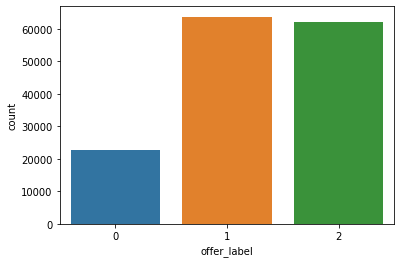

In [19]:
sns.countplot(x='offer_label', data=offers)

## Division of the set in training and testing

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X, y = offers.drop('offer_label', axis=1), offers['offer_label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
train = y_train.to_frame().merge(X_train,left_index=True, right_index=True)
train.head()

,offer_label,reward,difficulty,duration,mobile,social,web
143428,2,3,7,7,1,1,1
44682,0,0,0,4,1,0,1
119458,2,2,10,10,1,1,1
16051,1,5,5,5,1,1,1
77587,2,2,10,7,1,0,1


## Saving dataframes to .csv files

In [32]:
offers.to_csv('data/offers_ml.csv', index=False)

In [35]:
train.to_csv('data/train.csv', index=False)

In [36]:
X_train.to_csv('data/X_train.csv', index=False)

In [37]:
X_test.to_csv('data/X_test.csv', index=False)

In [38]:
y_train.to_csv('data/y_train.csv', index=False)

In [39]:
y_test.to_csv('data/y_test.csv', index=False)